# Livro para consulta:
- https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html
- https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html
    

# 1. Importando bibliotecas <a name="import"></a>

<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [133]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# 2. Carregando o dataframe SINASC <a name="read"></a>
<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [135]:
sinasc_raw = pd.read_csv('G:\Downloads\M5E1\M5E1\Tarefa1\SINASC_RO_2019.csv')
sinasc_raw.head()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


# Tarefa 1

### 1. Idade media das mães e dos pais por município (coluna munResNome)


In [137]:
# Calculando a idade média das mães por município
idade_media_maes = sinasc_raw.groupby('munResNome')['IDADEMAE'].mean().reset_index()

# Calculando a idade médiq dos pais por município
idade_media_pais = sinasc_raw.groupby('munResNome')['IDADEPAI'].mean().reset_index()

# Exibindo os resultados
idade_media_maes.head()
idade_media_pais.head()

,munResNome,IDADEPAI
0,Alta Floresta D'Oeste,29.548701
1,Alto Alegre dos Parecis,29.179104
2,Alto Paraíso,28.833333
3,Alvorada D'Oeste,30.757282
4,Ariquemes,32.466667


### 2. Peso médio dos bebes por sexo que nasceram no dia do seu aniversário por faixas de escolaridade mae
Ex: Você, aluna(o), nasceu no dia 10/01, então você precisa filtrar o conjunto de dados nessa data e calcular o peso médio dos bebês de cada sexo por faixa de escolaridade da mãe.

In [139]:
# Filtrando os dados pela data de nascimento
aniversario = '10/05'
sinasc_aniversario = sinasc_raw[sinasc_raw['DTNASC'].str.contains(aniversario)]

# Calculando o peso médio dos bebês por sexo e faixa de escolaridade da mãe
peso_medio_bebes = sinasc_aniversario.groupby(['SEXO', 'ESCMAE'])['PESO'].mean().reset_index()

# Exibindo os resultados
peso_medio_bebes

,SEXO,ESCMAE,PESO


### 3. Qual o municipio que nasceu menos bebe em 2019?
    - qual a idade media, maxima, minima das maes nesse municipio?
    - qual a idade media, maxima, minima dos pais nesse municipio?

In [141]:
# Mmunicípio com menos nascimentos em 2019
municipio_menos_nascimentos = sinasc_raw['munResNome'].value_counts().idxmin()

# Filtrando os dados para o município com menos nascimentos
dados_municipio_menos = sinasc_raw[sinasc_raw['munResNome'] == municipio_menos_nascimentos]

# Calculando as estatísticas das idades das mães e dos pais
idade_maes_menor_municipio = dados_municipio_menos['IDADEMAE'].agg(['mean', 'max', 'min']).reset_index()
idade_pais_menor_municipio = dados_municipio_menos['IDADEPAI'].agg(['mean', 'max', 'min']).reset_index()

# Exibindo os resultados
print(f"Município com menos nascimentos: {municipio_menos_nascimentos}")
idade_maes_menor_municipio
idade_pais_menor_municipio

Município com menos nascimentos: Município ignorado - RO


,index,IDADEPAI
0,mean,22.0
1,max,22.0
2,min,22.0


In [143]:
# Município com menos nascimentos em 2019
nascimentos_por_municipio = sinasc_raw['munResNome'].value_counts()

# Primeiro município com menos nascimentos
municipio_menos_nascimentos = nascimentos_por_municipio.idxmin()

# Segundo município com menos nascimentos (ignorando "Município ignorado - RO")
municipio_menos_nascimentos_2 = nascimentos_por_municipio[nascimentos_por_municipio.index != municipio_menos_nascimentos].idxmin()

# Filtrando os dados para o segundo município com menos nascimentos
dados_municipio_menos_2 = sinasc_raw[sinasc_raw['munResNome'] == municipio_menos_nascimentos_2]

# Calculando as estatísticas das idades das mães e dos pais no segundo município
idade_maes_menor_municipio_2 = dados_municipio_menos_2['IDADEMAE'].agg(['mean', 'max', 'min']).reset_index()
idade_pais_menor_municipio_2 = dados_municipio_menos_2['IDADEPAI'].agg(['mean', 'max', 'min']).reset_index()


print(f"\nSegundo município com menos nascimentos: {municipio_menos_nascimentos_2}")
print("Estatísticas das idades das mães no segundo município:")
print(idade_maes_menor_municipio_2)
print("Estatísticas das idades dos pais no segundo município:")
print(idade_pais_menor_municipio_2)


Segundo município com menos nascimentos: Castanheiras
Estatísticas das idades das mães no segundo município:
  index  IDADEMAE
0  mean  27.28125
1   max  39.00000
2   min  17.00000
Estatísticas das idades dos pais no segundo município:
  index   IDADEPAI
0  mean  30.392857
1   max  43.000000
2   min  17.000000


### 4. Qual o municipio que nasceu mais bebe no mês de março?
    - qual a quantidade de filhos vivos media, maxima, minima nesse municipio?
    - qual a idade media, maxima, minima dos pais nesse municipio?



In [145]:
# Convertendo a coluna DTNASC para datetime
sinasc_raw['DTNASC'] = pd.to_datetime(sinasc_raw['DTNASC'], errors='coerce')

# Filtrando os dados para o mês de março
sinasc_marco = sinasc_raw[sinasc_raw['DTNASC'].dt.month == 3]

# Agrupando os dados por município
grupo_marco = sinasc_marco.groupby('munResNome').size()

# Município com mais nascidos
municipio_mais_nascimentos_marco = grupo_marco.idxmax()
print(f"Município com mais nascimentos em março: {municipio_mais_nascimentos_marco}")

# Filtrando os dados para o município com mais nascimentos em março
dados_municipio_mais_marco = sinasc_marco[sinasc_marco['munResNome'] == municipio_mais_nascimentos_marco]

# Calculando as estatísticas do númerp de filhos vivos e idades dos pais
filhos_vivos_mais_municipio_marco = dados_municipio_mais_marco['QTDFILVIVO'].agg(['mean', 'max', 'min']).reset_index()
idade_pais_mais_municipio_marco = dados_municipio_mais_marco['IDADEPAI'].agg(['mean', 'max', 'min']).reset_index()

# Exibindo os resultados
filhos_vivos_mais_municipio_marco.columns = ['Estatística', 'Filhos Vivos']
idade_pais_mais_municipio_marco.columns = ['Estatística', 'Idade dos Pais']

print(filhos_vivos_mais_municipio_marco)
print(idade_pais_mais_municipio_marco)

Município com mais nascimentos em março: Porto Velho
  Estatística  Filhos Vivos
0        mean      1.295056
1         max      9.000000
2         min      0.000000
  Estatística  Idade dos Pais
0        mean       34.629032
1         max       62.000000
2         min       19.000000


### Analise as respostas encontradas, tire algum insight delas, conte pra gente algo encontrado nos dados. Algo que você julgue relevante e novo pra você.

PARTO                 munResNome  Cesáreo  Vaginal
0          Alta Floresta D'Oeste    295.0     70.0
1        Alto Alegre dos Parecis    124.0     30.0
2                   Alto Paraíso    169.0     57.0
3               Alvorada D'Oeste    147.0     58.0
4                      Ariquemes   1176.0    553.0
5                        Buritis    430.0    153.0
6                         Cabixi     60.0     20.0
7                    Cacaulândia     56.0     19.0
8                         Cacoal   1113.0    261.0
9         Campo Novo de Rondônia    126.0     40.0
10            Candeias do Jamari    164.0    172.0
11                  Castanheiras     24.0      8.0
12                    Cerejeiras    179.0     58.0
13                   Chupinguaia    110.0     52.0
14             Colorado do Oeste    160.0     54.0
15                    Corumbiara     90.0     37.0
16                 Costa Marques    148.0     85.0
17                       Cujubim    117.0     88.0
18               Espigão D'Oest

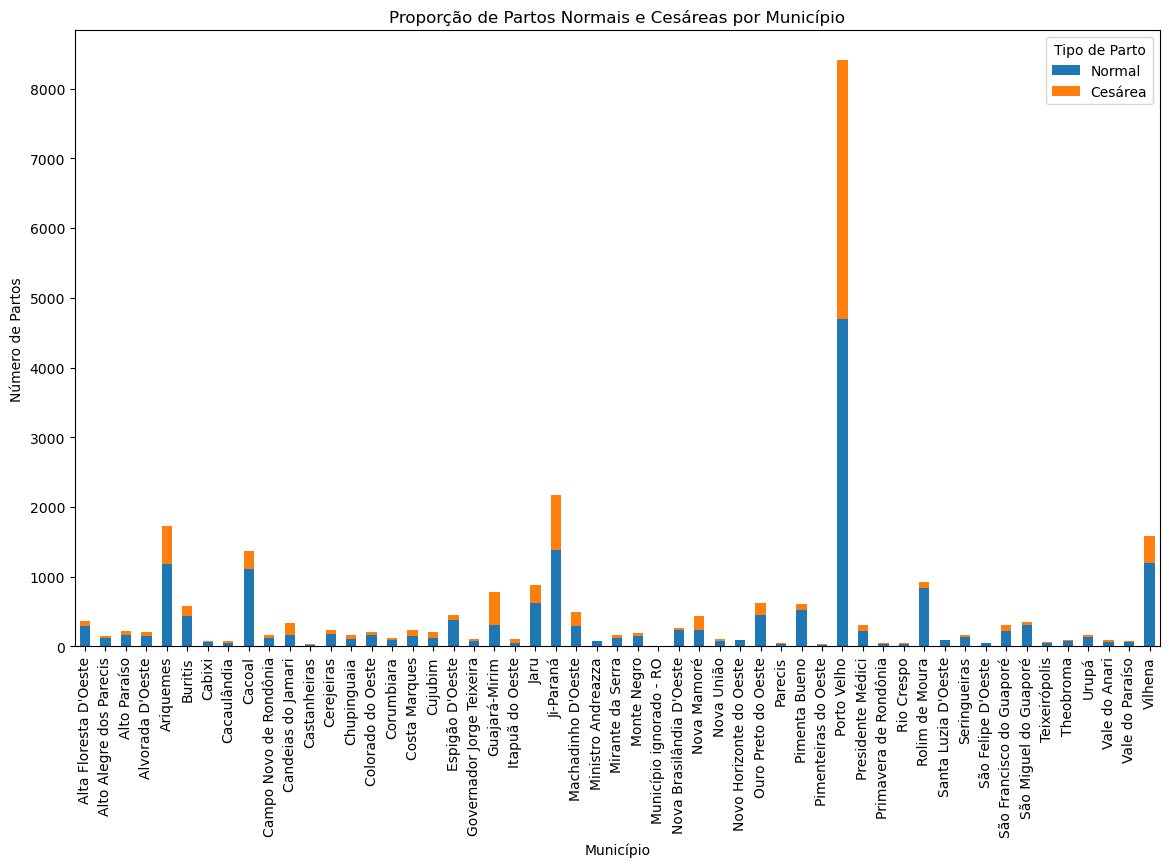

In [147]:
# Calculando a proporção de partos normais e cesáreas
parto_por_municipio = sinasc_raw.groupby(['munResNome', 'PARTO']).size().unstack().reset_index()

# Exibindo os resultados
print(parto_por_municipio)

# Visualizando a proporção de partos normais e cesáreas por município
parto_por_municipio.plot(kind='bar', x='munResNome', stacked=True, figsize=(14, 8))
plt.title('Proporção de Partos Normais e Cesáreas por Município')
plt.xlabel('Município')
plt.ylabel('Número de Partos')
plt.legend(title='Tipo de Parto', labels=['Normal', 'Cesárea'])
plt.show()

Insight:
Podemos ver que o parto cesarioano é muito mais comum na maioria dos municípios de RO. Apenas no município de Itapuã do Oeste, que o parto vaginal é mais comum e, mesmo assim, muito próximo do parto por cesária.

Exemplo:
- Ah, descobri que a idade mediana das mulheres que deram a luz no ano de 2019 dos municipios x é maior que y.

In [6]:
sinasc_raw.dtypes

ORIGEM          int64
CODESTAB      float64
CODMUNNASC      int64
LOCNASC         int64
IDADEMAE        int64
               ...   
munResUf       object
munResLat     float64
munResLon     float64
munResAlt     float64
munResArea    float64
Length: 69, dtype: object

In [7]:
sinasc_raw.select_dtypes(exclude=['int64','float64'])

,ESCMAE,GESTACAO,GRAVIDEZ,PARTO,DTNASC,SEXO,RACACOR,DTCADASTRO,CODANOMAL,VERSAOSIST,DTRECEBIM,munResStatus,munResTipo,munResNome,munResUf
0,8 a 11 anos,37 a 41 semanas,Única,Cesáreo,2019-02-19,Masculino,Branca,2019-03-08,NaN,3.2.01,2019-03-08,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia
1,8 a 11 anos,37 a 41 semanas,Única,Cesáreo,2019-02-21,Feminino,Branca,2019-03-08,NaN,3.2.01,2019-03-08,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia
2,8 a 11 anos,37 a 41 semanas,Única,Cesáreo,2019-02-25,Feminino,Branca,2019-03-08,NaN,3.2.01,2019-03-08,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia
3,12 anos ou mais,37 a 41 semanas,Única,Cesáreo,2019-03-20,Feminino,Parda,2019-04-03,NaN,3.2.01,2019-04-09,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia
4,8 a 11 anos,37 a 41 semanas,Única,Cesáreo,2019-03-23,Feminino,Parda,2019-04-03,NaN,3.2.01,2019-04-09,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27023,12 anos ou mais,32 a 36 semanas,Única,Cesáreo,2019-12-13,Masculino,Branca,2020-09-28,NaN,3.2.01,2020-10-13,ATIVO,MUNIC,Vilhena,Rondônia
27024,8 a 11 anos,37 a 41 semanas,Única,Vaginal,2019-10-04,Masculino,Branca,2019-10-16,NaN,3.2.01,2019-10-21,ATIVO,MUNIC,Chupinguaia,Rondônia
27025,8 a 11 anos,37 a 41 semanas,Única,Cesáreo,2019-08-02,Masculino,Parda,2019-08-07,NaN,3.2.00,2019-08-07,ATIVO,MUNIC,Vilhena,Rondônia
27026,8 a 11 anos,32 a 36 semanas,Única,Vaginal,2019-12-23,Masculino,Parda,2020-01-07,NaN,3.2.00,2020-01-07,ATIVO,MUNIC,Vilhena,Rondônia


In [4]:
sinasc_raw.columns

Index(['ORIGEM', 'CODESTAB', 'CODMUNNASC', 'LOCNASC', 'IDADEMAE', 'ESTCIVMAE',
       'ESCMAE', 'CODOCUPMAE', 'QTDFILVIVO', 'QTDFILMORT', 'CODMUNRES',
       'GESTACAO', 'GRAVIDEZ', 'PARTO', 'CONSULTAS', 'DTNASC', 'HORANASC',
       'SEXO', 'APGAR1', 'APGAR5', 'RACACOR', 'PESO', 'IDANOMAL', 'DTCADASTRO',
       'CODANOMAL', 'NUMEROLOTE', 'VERSAOSIST', 'DTRECEBIM', 'DIFDATA',
       'DTRECORIGA', 'NATURALMAE', 'CODMUNNATU', 'CODUFNATU', 'ESCMAE2010',
       'SERIESCMAE', 'DTNASCMAE', 'RACACORMAE', 'QTDGESTANT', 'QTDPARTNOR',
       'QTDPARTCES', 'IDADEPAI', 'DTULTMENST', 'SEMAGESTAC', 'TPMETESTIM',
       'CONSPRENAT', 'MESPRENAT', 'TPAPRESENT', 'STTRABPART', 'STCESPARTO',
       'TPNASCASSI', 'TPFUNCRESP', 'TPDOCRESP', 'DTDECLARAC', 'ESCMAEAGR1',
       'STDNEPIDEM', 'STDNNOVA', 'CODPAISRES', 'TPROBSON', 'PARIDADE',
       'KOTELCHUCK', 'CONTADOR', 'munResStatus', 'munResTipo', 'munResNome',
       'munResUf', 'munResLat', 'munResLon', 'munResAlt', 'munResArea'],
      dtype='object')